In [45]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
# loading raw dataset
df = pd.read_csv("../data/cleaned/cleaned_telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Payment Method,Monthly Charge,Total Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Calculated Charges,Charges Difference,Churn
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,Unknown,Yes,...,Credit Card,65.6,593.30,974.81,Stayed,Not churned,Not churned,590.4,2.90,0.0
1,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,Bank Withdrawal,73.9,280.85,415.45,Churned,Competitor,Competitor had better devices,295.6,14.75,1.0
2,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,Bank Withdrawal,98.0,1237.85,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1274.0,36.15,1.0
3,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,Unknown,Yes,...,Credit Card,83.9,267.40,289.54,Churned,Dissatisfaction,Network reliability,251.7,15.70,1.0
4,0013-MHZWF,Female,23,No,3,Midpines,0,9,Offer E,Yes,...,Credit Card,69.4,571.45,722.38,Stayed,Not churned,Not churned,624.6,53.15,0.0


In [47]:
# Dataset overview
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(df.shape)
print(df.info())
print(df.describe())

customer_status_counts = df["Customer Status"].value_counts()
print("\nCustomer status count", customer_status_counts)
print(df["Customer Status"].value_counts(normalize=True))

# df["Customer Status"] = (df["Customer Status"] == "Churned").astype(int)
# df.head()

DATASET OVERVIEW
(6801, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             6801 non-null   object 
 1   Gender                  6801 non-null   object 
 2   Age                     6801 non-null   int64  
 3   Married                 6801 non-null   object 
 4   Number of Dependents    6801 non-null   int64  
 5   City                    6801 non-null   object 
 6   Number of Referrals     6801 non-null   int64  
 7   Tenure in Months        6801 non-null   int64  
 8   Offer                   6801 non-null   object 
 9   Phone Service           6801 non-null   object 
 10  Multiple Lines          6801 non-null   object 
 11  Internet Service        6801 non-null   object 
 12  Internet Type           6801 non-null   object 
 13  Online Security         6801 non-null   object 
 14  Online Backu

Total customer count is 6920, percentage of churned is 26.81% and active customer stands at 73.19%.
This shows major imbalance, as active customer is 3 times the churned

TARGET ANALYSIS (CUSTOMER CHURN)


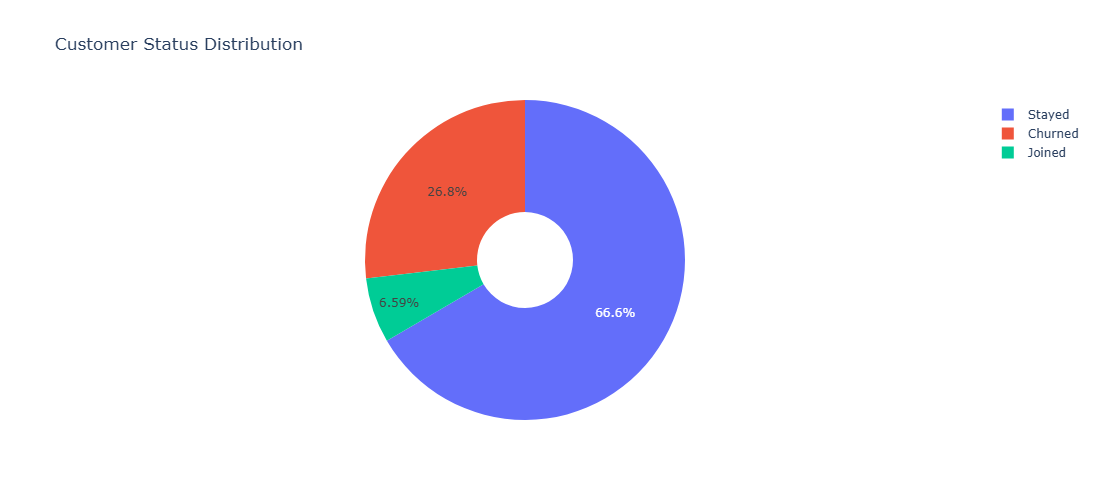

In [48]:
print("=" * 60)
print("TARGET ANALYSIS (CUSTOMER CHURN)")
print("=" * 60)

# Churn Distribution
fig = px.pie(
    df,
    names="Customer Status",       
    title="Customer Status Distribution",
    width=500,
    height=500,                       
    hole=0.3
)
fig.show()

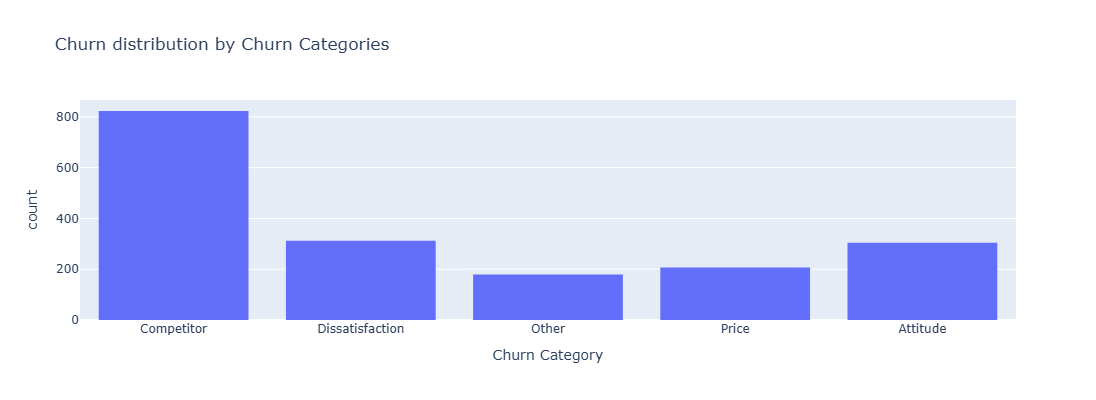

In [49]:
# Churn Category Breakdown
px.histogram(
    df[df["Customer Status"]=="Churned"], 
    x="Churn Category",
    title="Churn distribution by Churn Categories",
    width=600,
    height=400
)

In [50]:
# Top 10 reasons why customers churn
churn_reason = df[df["Customer Status"]=="Churned"]["Churn Reason"].value_counts()
churn_reason.head(10)

Churn Reason
Competitor had better devices                309
Competitor made better offer                 301
Attitude of support person                   214
Don't know                                   127
Competitor offered more data                 115
Competitor offered higher download speeds     98
Attitude of service provider                  90
Price too high                                78
Product dissatisfaction                       74
Network reliability                           71
Name: count, dtype: int64

DEMOGRAPHIC ANALYSIS


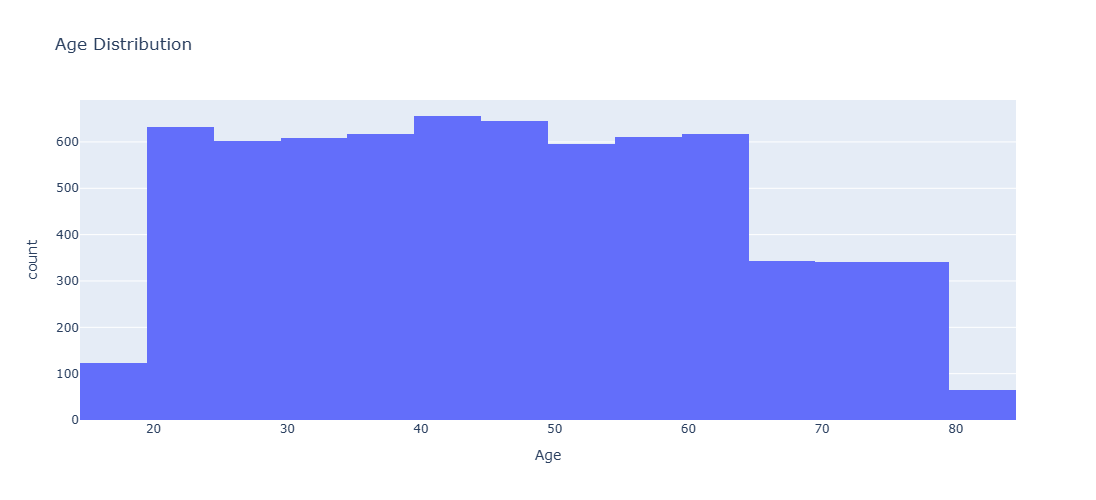

In [51]:
print("=" * 60)
print("DEMOGRAPHIC ANALYSIS")
print("=" * 60)

# Age Distribution
px.histogram(
    df,
    x="Age",
    nbins=30, 
    title="Age Distribution",
    width=500,
    height=500
)


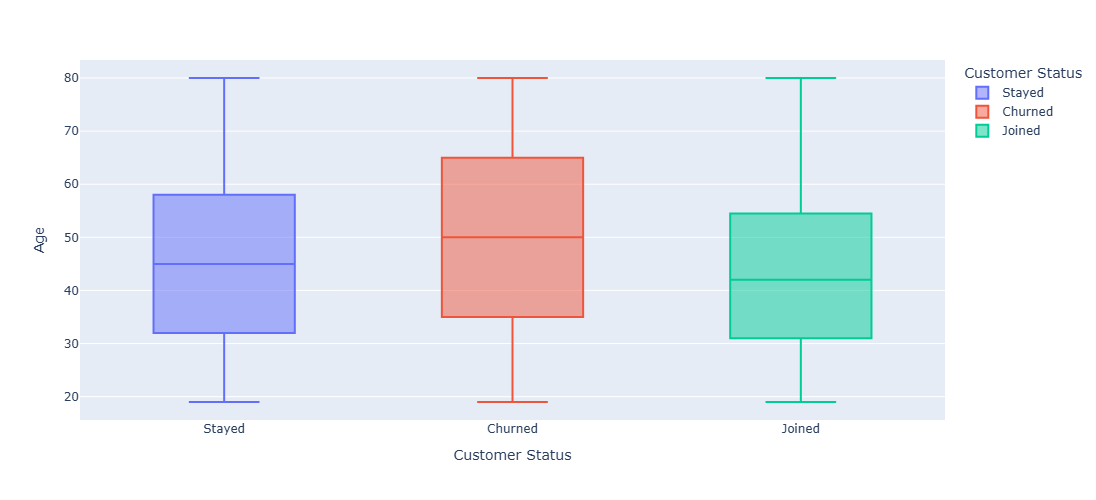

In [52]:
# Age vs Churn
px.box(
    df, 
    x="Customer Status", 
    y="Age", 
    color="Customer Status",
    width=800,
    height=500
)


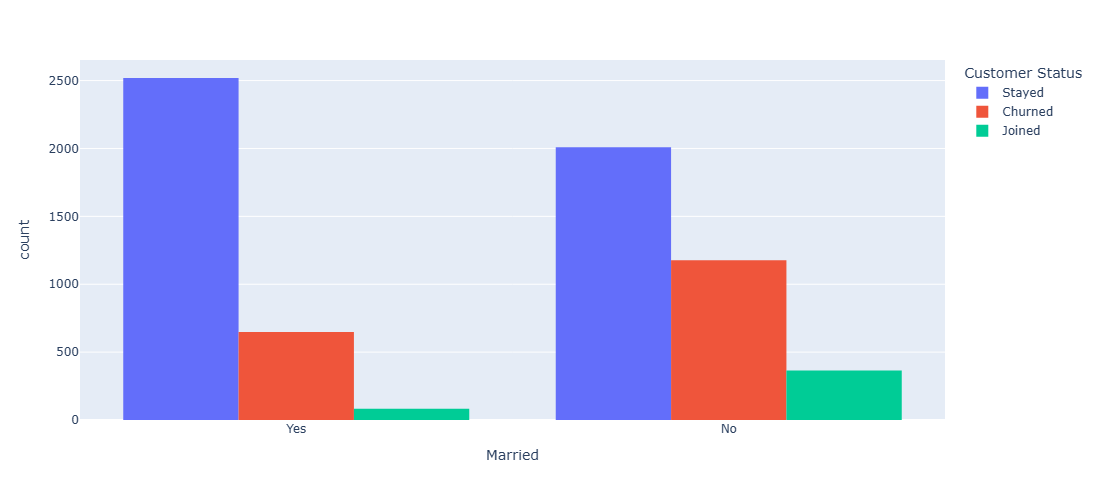

In [53]:
# Married vs Churn
px.histogram(
    df, 
    x="Married", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=500
)

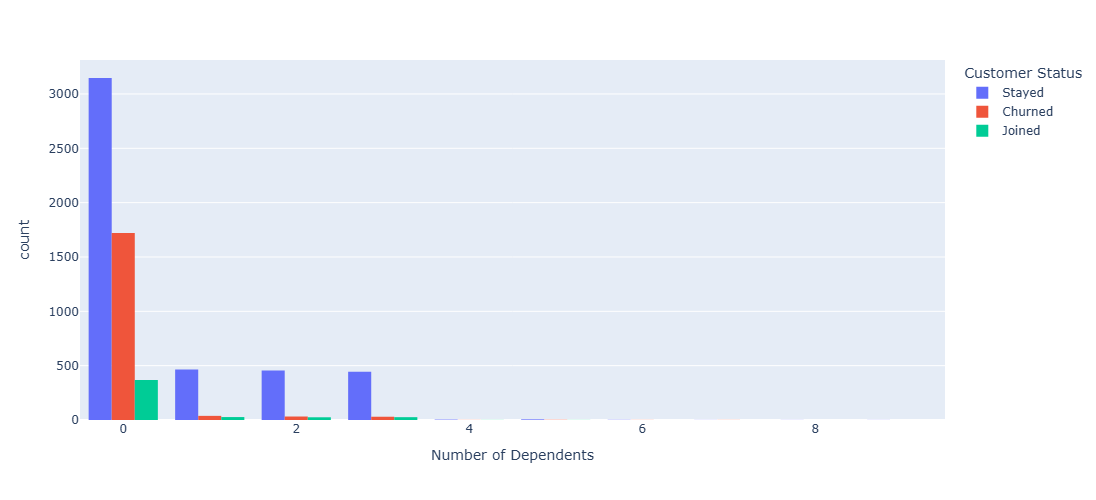

In [54]:
# Dependents vs Churn
px.histogram(
    df, 
    x="Number of Dependents", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=500
)

FINANCIAL ANALYSIS


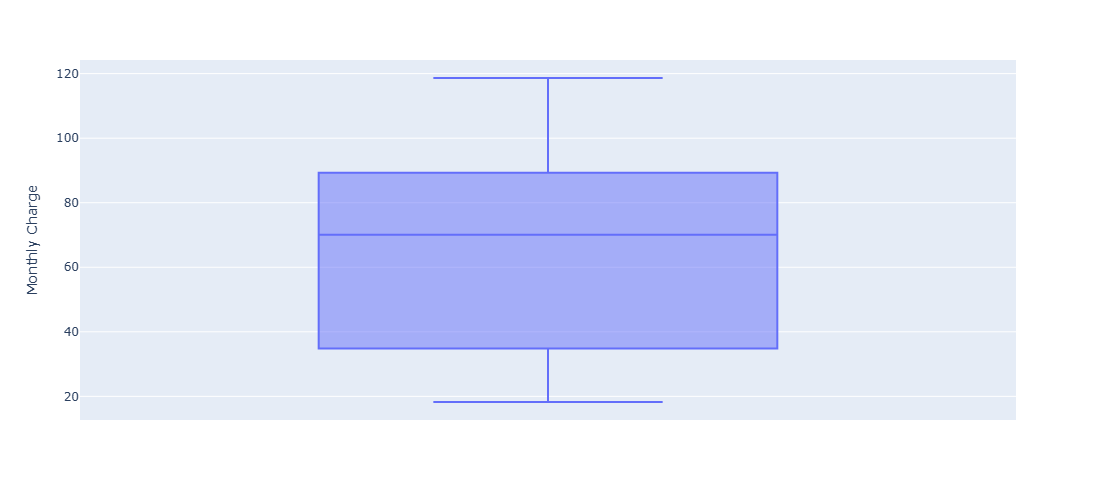

In [55]:
print("=" * 60)
print("FINANCIAL ANALYSIS")
print("=" * 60)

# Monthly Charge Distribution
px.box(
    df,
    y="Monthly Charge",
    width=500,
    height=500
)

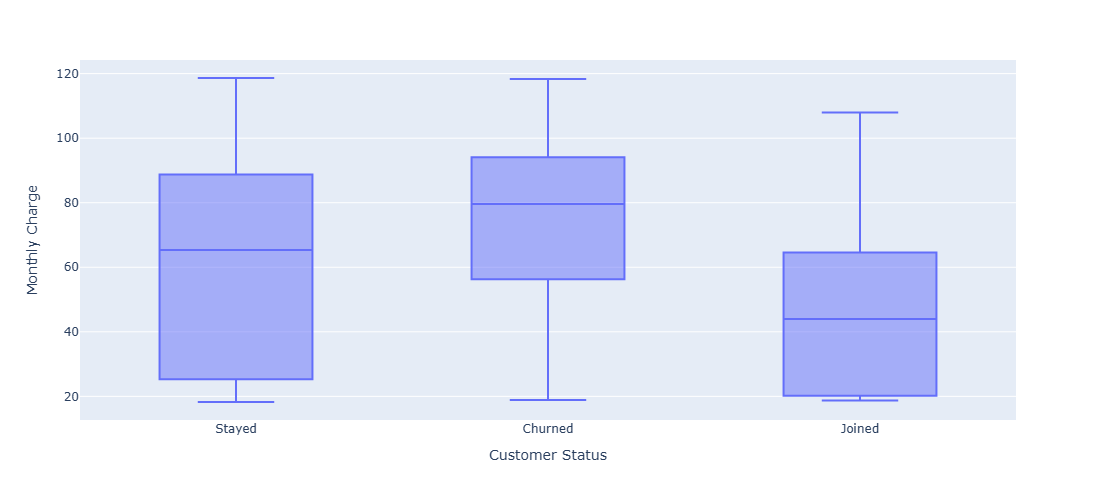

In [56]:
# Monthly Charge vs Churn
px.box(
    df, 
    x="Customer Status", 
    y="Monthly Charge",
    width=800,
    height=500
)

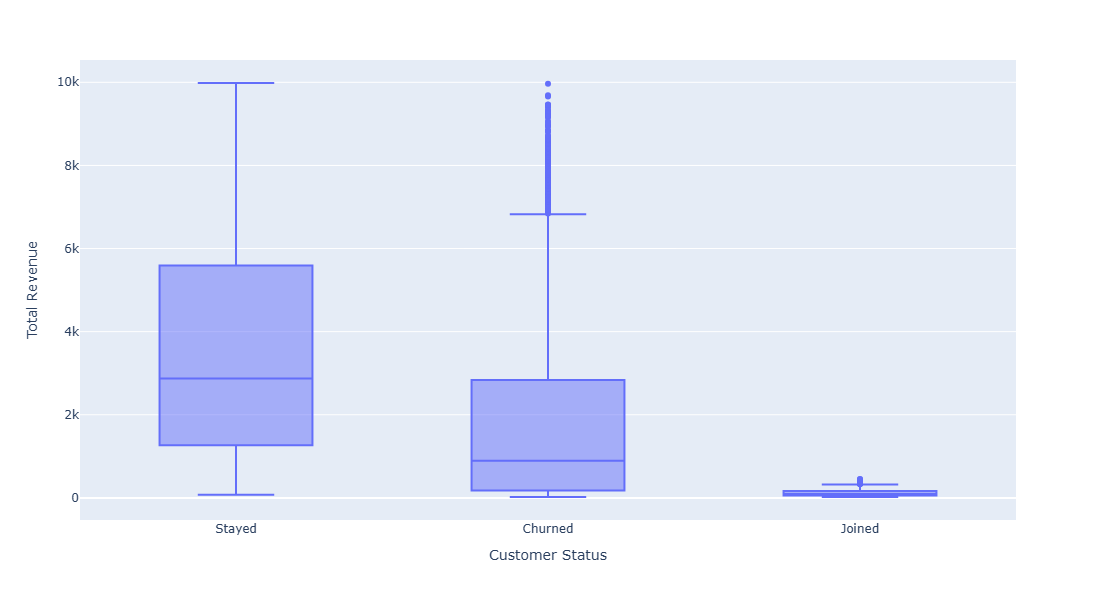

In [57]:
# Total Revenue vs Churn
px.box(
    df, 
    x="Customer Status", 
    y="Total Revenue",
    width=600,
    height=600
)

In [58]:
# Revenue at Risk
df[df["Customer Status"]=="Churned"]["Total Revenue"].sum()

np.float64(3505423.9699999997)

CONTRACT & PAYMENT METHOD


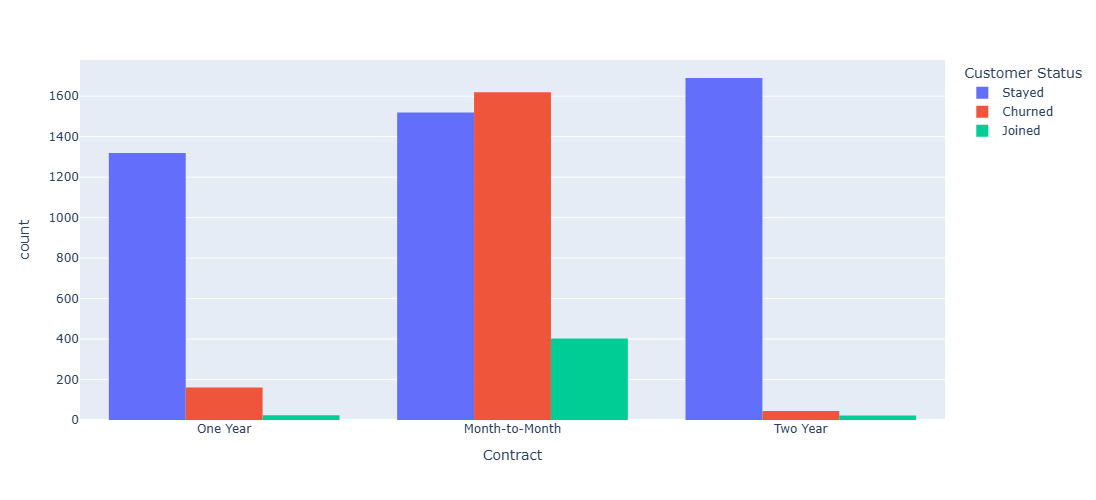

In [59]:
print("=" * 60)
print("CONTRACT & PAYMENT METHOD")
print("=" * 60)

# contract type
px.histogram(
    df,
    x="Contract", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=500
)

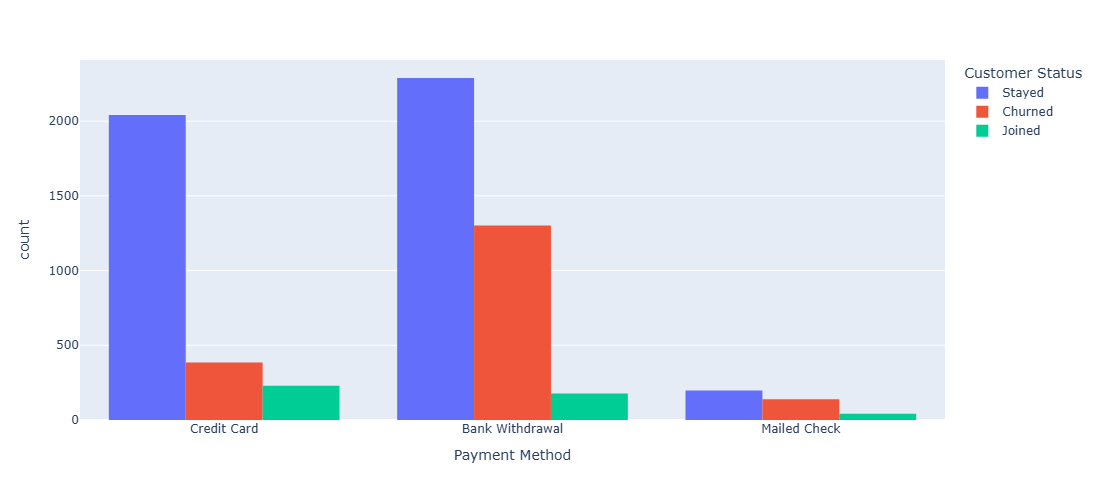

In [60]:
# Payment Method
px.histogram(
    df, 
    x="Payment Method", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=500
)

SERVICE USAGE PATTERN


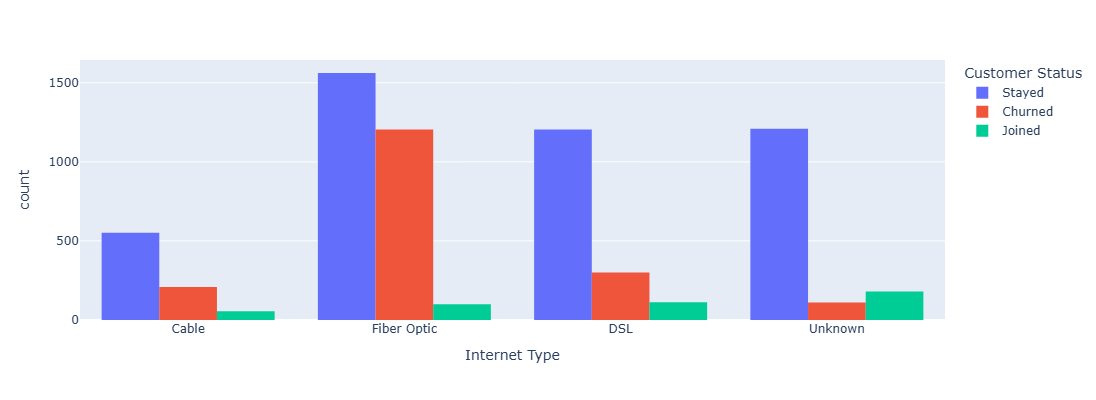

In [61]:
print("=" * 60)
print("SERVICE USAGE PATTERN")
print("=" * 60)

# Internet Type vs Churn
px.histogram(
    df, 
    x="Internet Type", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=400
)

SERVICE USAGE PATTERN


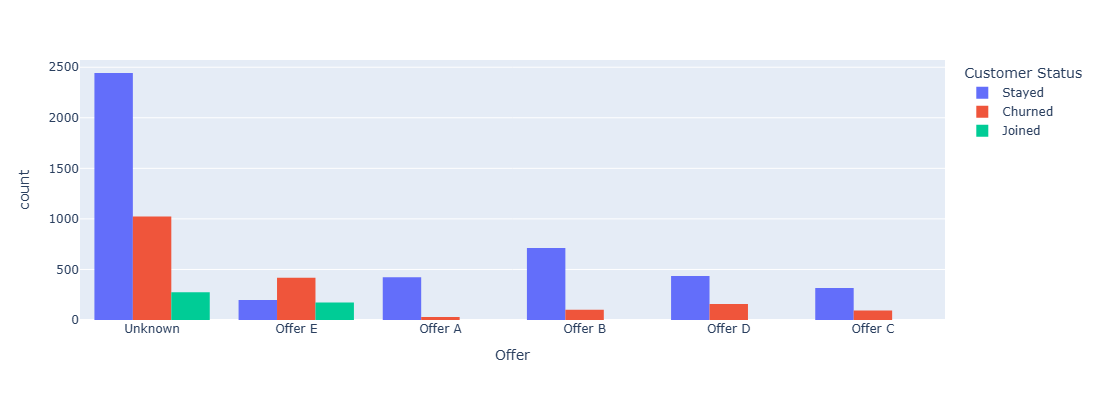

In [62]:
print("SERVICE USAGE PATTERN")
print("=" * 60)

# Internet Type vs Churn
px.histogram(
    df, 
    x="Offer", 
    color="Customer Status", 
    barmode="group",
    width=800,
    height=400
)

In [63]:
print("=" * 60)
print("CORRELATION AND NUMERIC ANALYSIS")
print("=" * 60)

df["Churn"] = df["Customer Status"].map({"Churned":1,"Stayed":0})
numeric_cols = df.select_dtypes(include="number")
churn_corr = numeric_cols.corr()["Churn"].sort_values(ascending=False)
churn_corr= churn_corr.to_frame()

churn_corr

CORRELATION AND NUMERIC ANALYSIS


,Churn
Churn,1.000000
Monthly Charge,0.191780
Age,0.115243
Charges Difference,-0.182272
Number of Dependents,-0.232752
Total Charges,-0.245606
Calculated Charges,-0.245722
Total Revenue,-0.278137
Number of Referrals,-0.312305
Tenure in Months,-0.433339
